### Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile dataset. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles by day in the subway system.

The data files are available on MTA's [website](http://web.mta.info/developers/turnstile.html).

In [ ]:
!pip install wget

In [2]:
import wget

url_template = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_%s.txt"
for date in ['160206', '160213', '160220', '160227', '160305']:
    url = url_template % date
    wget.download(url, out='data/')
    print(date, 'file downloaded')

160206 file downloaded
160213 file downloaded
160220 file downloaded
160227 file downloaded
160305 file downloaded


#### Our first step will be to create a dictionary of which the key will be the columns representing a turnstile (C/A, UNIT, SCP, STATION) and the value will be a list of the entries for that turnstile. It should look like so:


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }


In [3]:
import csv, glob
from collections import defaultdict

def read_csv(csv_file_name):
    turnstile_to_count_reading = defaultdict(list)
    with open(csv_file_name, 'r') as csv_file:
        mta_reader = csv.reader(csv_file)
        for i, row in enumerate(mta_reader):
            if i == 0:
                continue
                
            turnstile_info = tuple(row[:4])
            count_reading = row[4:]
            turnstile_to_count_reading[turnstile_info].append(count_reading)
            
    return turnstile_to_count_reading

In [4]:
weekly_data_dicts = [read_csv(csvfile) for csvfile in glob.glob('data/turnstile_*.txt')]

In [5]:
sample_dict = list(weekly_data_dicts[0].items())[:1]
sample_dict

[(('N071', 'R013', '00-00-04', '34 ST-PENN STA'),
  [['ACE',
    'IND',
    '01/30/2016',
    '03:00:00',
    'REGULAR',
    '0007104512',
    '0002499947                                       '],
   ['ACE',
    'IND',
    '01/30/2016',
    '07:00:00',
    'REGULAR',
    '0007104522',
    '0002499965                                       '],
   ['ACE',
    'IND',
    '01/30/2016',
    '11:00:00',
    'REGULAR',
    '0007104617',
    '0002500058                                       '],
   ['ACE',
    'IND',
    '01/30/2016',
    '15:00:00',
    'REGULAR',
    '0007104845',
    '0002500187                                       '],
   ['ACE',
    'IND',
    '01/30/2016',
    '19:00:00',
    'REGULAR',
    '0007105204',
    '0002500307                                       '],
   ['ACE',
    'IND',
    '01/30/2016',
    '23:00:00',
    'REGULAR',
    '0007105468',
    '0002500337                                       '],
   ['ACE',
    'IND',
    '01/31/2016',
    '03:00:00',
    'REGULAR

In [6]:
from datetime import datetime
from dateutil.parser import parse

def convert_week_data_to_time_series(week_data_dict):
    turnstile_to_time_series = defaultdict(list)
    for i, (turnstile, row_data) in enumerate(week_data_dict.items()):
        if i % 200 == 0:
            print('Processing turnstile', turnstile)
        for lines, division, datestr, timestr, event, cum_entries, cum_exits in row_data:
            timestamp = parse('%sT%s' % (datestr, timestr))
            turnstile_to_time_series[turnstile].append([timestamp, int(cum_entries)])
            
    return turnstile_to_time_series

In [7]:
weekly_time_series = list(map(convert_week_data_to_time_series, weekly_data_dicts))

Processing turnstile ('N071', 'R013', '00-00-04', '34 ST-PENN STA')
Processing turnstile ('N316A', 'R267', '01-00-02', '46 ST')
Processing turnstile ('N094', 'R029', '01-00-00', 'WORLD TRADE CTR')
Processing turnstile ('C011', 'R231', '01-00-02', 'UNION ST')
Processing turnstile ('R317', 'R408', '01-00-01', 'SIMPSON ST')
Processing turnstile ('S101A', 'R070', '01-00-05', 'ST. GEORGE')
Processing turnstile ('H006', 'R330', '01-00-02', '3 AV')
Processing turnstile ('N306', 'R017', '00-03-01', 'LEXINGTON AV/53')
Processing turnstile ('R200A', 'R041', '01-00-01', 'BOWLING GREEN')
Processing turnstile ('A058', 'R001', '01-00-03', 'WHITEHALL S-FRY')
Processing turnstile ('R336', 'R145', '00-00-01', 'WAKEFIELD/241')
Processing turnstile ('R116', 'R030', '00-00-01', 'CHAMBERS ST')
Processing turnstile ('R118', 'R343', '01-00-02', 'FRANKLIN ST')
Processing turnstile ('N600', 'R302', '00-06-01', '57 ST')
Processing turnstile ('PTH07', 'R550', '00-01-03', 'CITY / BUS')
Processing turnstile ('N600

In [8]:
sample_turnstile_to_time_series = list(weekly_time_series[0].items())[:2]
sample_turnstile_to_time_series

[(('PTH20', 'R549', '03-01-07', 'NEWARK HM HE'),
  [[datetime.datetime(2016, 1, 30, 1, 55, 9), 13045],
   [datetime.datetime(2016, 1, 30, 6, 7, 9), 13045],
   [datetime.datetime(2016, 1, 30, 10, 19, 9), 13045],
   [datetime.datetime(2016, 1, 30, 14, 31, 9), 13045],
   [datetime.datetime(2016, 1, 30, 18, 43, 9), 13045],
   [datetime.datetime(2016, 1, 30, 22, 55, 9), 13045],
   [datetime.datetime(2016, 1, 31, 3, 7, 9), 13045],
   [datetime.datetime(2016, 1, 31, 7, 19, 9), 13045],
   [datetime.datetime(2016, 1, 31, 11, 31, 9), 13045],
   [datetime.datetime(2016, 1, 31, 15, 43, 9), 13045],
   [datetime.datetime(2016, 1, 31, 19, 55, 9), 13045],
   [datetime.datetime(2016, 2, 1, 0, 7, 9), 13045],
   [datetime.datetime(2016, 2, 1, 4, 19, 9), 13045],
   [datetime.datetime(2016, 2, 1, 8, 31, 9), 13045],
   [datetime.datetime(2016, 2, 1, 12, 43, 9), 13045],
   [datetime.datetime(2016, 2, 1, 16, 55, 9), 13045],
   [datetime.datetime(2016, 2, 1, 21, 7, 9), 13045],
   [datetime.datetime(2016, 2, 2,

In [9]:
def combine_multiple_weeks_into_single_high_res_timeseries(weekly_time_series):
    combined_time_series = defaultdict(list)
    for turnstile_to_weeklong_time_series in weekly_time_series:
        for turnstile, weeklong_time_series in turnstile_to_weeklong_time_series.items():
            combined_time_series[turnstile] += weeklong_time_series
            
    # It's already sorted due to the nature of the files
    return combined_time_series


turnstile_to_full_time_series = combine_multiple_weeks_into_single_high_res_timeseries(weekly_time_series)

In [10]:
sample_turnstile_to_full_time_series = list(turnstile_to_full_time_series.items())[:2]
sample_turnstile_to_full_time_series

[(('R509', 'R121', '00-00-03', 'QUEENSBORO PLZ'),
  [[datetime.datetime(2016, 1, 30, 3, 0), 3345538],
   [datetime.datetime(2016, 1, 30, 7, 0), 3345576],
   [datetime.datetime(2016, 1, 30, 11, 0), 3345747],
   [datetime.datetime(2016, 1, 30, 15, 0), 3346044],
   [datetime.datetime(2016, 1, 30, 19, 0), 3346366],
   [datetime.datetime(2016, 1, 30, 23, 0), 3346489],
   [datetime.datetime(2016, 1, 31, 3, 0), 3346552],
   [datetime.datetime(2016, 1, 31, 7, 0), 3346578],
   [datetime.datetime(2016, 1, 31, 11, 0), 3346696],
   [datetime.datetime(2016, 1, 31, 15, 0), 3346950],
   [datetime.datetime(2016, 1, 31, 19, 0), 3347181],
   [datetime.datetime(2016, 1, 31, 23, 0), 3347249],
   [datetime.datetime(2016, 2, 1, 3, 0), 3347280],
   [datetime.datetime(2016, 2, 1, 7, 0), 3347321],
   [datetime.datetime(2016, 2, 1, 11, 0), 3347745],
   [datetime.datetime(2016, 2, 1, 15, 0), 3348012],
   [datetime.datetime(2016, 2, 1, 19, 0), 3348747],
   [datetime.datetime(2016, 2, 1, 23, 0), 3348899],
   [date

In [11]:
# Ignore January, March, weekends and 2016 NYC holidays (Feb 12th and 15th).
feb_nyc_holidays = [12, 15]

removed = 0
for turnstile, turnstile_data in turnstile_to_full_time_series.items():
    # iterate over a copy of the list in order to be able to remove items from the original
    for timestamp, cum_entries in list(turnstile_data):
        if timestamp.month != 2 or timestamp.weekday() >= 5 or timestamp.day in feb_nyc_holidays:
            if not (timestamp.month == 1 and timestamp.day == 31):
                # leave the last of january in order to be able to make the cumulative count
                turnstile_data.remove([timestamp, cum_entries])
                removed = removed + 1

print(removed)

414034


In [12]:
sample_turnstile_to_full_time_series = list(turnstile_to_full_time_series.items())[:2]
sample_turnstile_to_full_time_series

[(('R509', 'R121', '00-00-03', 'QUEENSBORO PLZ'),
  [[datetime.datetime(2016, 1, 31, 3, 0), 3346552],
   [datetime.datetime(2016, 1, 31, 7, 0), 3346578],
   [datetime.datetime(2016, 1, 31, 11, 0), 3346696],
   [datetime.datetime(2016, 1, 31, 15, 0), 3346950],
   [datetime.datetime(2016, 1, 31, 19, 0), 3347181],
   [datetime.datetime(2016, 1, 31, 23, 0), 3347249],
   [datetime.datetime(2016, 2, 1, 3, 0), 3347280],
   [datetime.datetime(2016, 2, 1, 7, 0), 3347321],
   [datetime.datetime(2016, 2, 1, 11, 0), 3347745],
   [datetime.datetime(2016, 2, 1, 15, 0), 3348012],
   [datetime.datetime(2016, 2, 1, 19, 0), 3348747],
   [datetime.datetime(2016, 2, 1, 23, 0), 3348899],
   [datetime.datetime(2016, 2, 2, 3, 0), 3348931],
   [datetime.datetime(2016, 2, 2, 7, 0), 3348985],
   [datetime.datetime(2016, 2, 2, 11, 0), 3349401],
   [datetime.datetime(2016, 2, 2, 15, 0), 3349715],
   [datetime.datetime(2016, 2, 2, 19, 0), 3350579],
   [datetime.datetime(2016, 2, 2, 23, 0), 3350772],
   [datetime.d

In [13]:
from itertools import groupby

def count_within_normal_bounds(count):
    if count is None:
        return True
    else:
        return 10000 > count >= 0

def convert_time_series_to_daily(high_res_time_series):
    daily_time_series = []
    
    def day_of_timestamp(time_series_entry):
        timestamp, tot_entries = time_series_entry
        return timestamp.date()
    
    # groupby() requires data to be sorted. It is sorted already here.
    count_on_previous_day = None
    for day, entries_on_this_day in groupby(high_res_time_series, key=day_of_timestamp):
        # get the maximum cumulative count among the entries on this day
        cum_entry_count_on_day = max([count for time, count in entries_on_this_day])
        # skip the first entry if we don't know the previous day
        if count_on_previous_day is None:
            daily_entries = None
        else:
            daily_entries = cum_entry_count_on_day - count_on_previous_day
        # Save today's count for tomorrow's calculation
        count_on_previous_day = cum_entry_count_on_day
        # Only append if the cumulative increased. Otherwise there is something wrong in the data
        # skip with a warning
        if count_within_normal_bounds(daily_entries):
            daily_time_series.append((day, daily_entries))
        else:
            print('WARNING. Abnormal entry count found on day %s: %s' % (day, daily_entries))
            daily_time_series.append((day, None))

    return daily_time_series


def convert_turnstile_to_high_res_time_series_to_daily(turnstile_to_time_series):
    turnstile_to_daily_time_series = {}
    for i, (turnstile, time_series) in enumerate(turnstile_to_time_series.items()):
        print('Processing turnstile', turnstile)
        turnstile_to_daily_time_series[turnstile] = convert_time_series_to_daily(time_series)
    return turnstile_to_daily_time_series


turnstile_to_daily_time_series = convert_turnstile_to_high_res_time_series_to_daily(turnstile_to_full_time_series)

Processing turnstile ('R509', 'R121', '00-00-03', 'QUEENSBORO PLZ')
Processing turnstile ('R730', 'R431', '00-00-02', 'EASTCHSTER/DYRE')
Processing turnstile ('R137', 'R031', '02-03-01', '34 ST-PENN STA')
Processing turnstile ('B019', 'R149', '00-00-02', 'NEWKIRK PLAZA')
Processing turnstile ('N067', 'R012', '00-03-01', '34 ST-PENN STA')
WARNING. Abnormal entry count found on day 2016-02-16: 10249
Processing turnstile ('N039', 'R251', '01-06-01', '96 ST')
Processing turnstile ('R646', 'R110', '01-00-02', 'FLATBUSH AV-B.C')
Processing turnstile ('B031', 'R172', '01-00-00', 'BRIGHTON BEACH')
Processing turnstile ('R533', 'R055', '00-03-00', 'FLUSHING-MAIN')
WARNING. Abnormal entry count found on day 2016-02-08: 10392
WARNING. Abnormal entry count found on day 2016-02-16: 18302
WARNING. Abnormal entry count found on day 2016-02-29: 11273
Processing turnstile ('R161B', 'R452', '00-03-01', '72 ST')
WARNING. Abnormal entry count found on day 2016-02-16: 13158
WARNING. Abnormal entry count fo

In [14]:
turnstile_to_daily_time_series[('N300', 'R113', '01-00-04', '7 AV')]

[(datetime.date(2016, 1, 31), None),
 (datetime.date(2016, 2, 1), 2205),
 (datetime.date(2016, 2, 2), 2392),
 (datetime.date(2016, 2, 3), 2570),
 (datetime.date(2016, 2, 4), 2551),
 (datetime.date(2016, 2, 5), 2444),
 (datetime.date(2016, 2, 8), 3690),
 (datetime.date(2016, 2, 9), 2235),
 (datetime.date(2016, 2, 10), 2394),
 (datetime.date(2016, 2, 11), 2510),
 (datetime.date(2016, 2, 16), 7517),
 (datetime.date(2016, 2, 17), 2366),
 (datetime.date(2016, 2, 18), 2263),
 (datetime.date(2016, 2, 19), 2417),
 (datetime.date(2016, 2, 22), 4181),
 (datetime.date(2016, 2, 23), 2397),
 (datetime.date(2016, 2, 24), 2455),
 (datetime.date(2016, 2, 25), 2440),
 (datetime.date(2016, 2, 26), 2280),
 (datetime.date(2016, 2, 29), 3564)]

In [15]:
from collections import Counter

def booth_of_a_time_series_item(item):
    turnstile, time_series = item
    control_area, unit, device_id, station = turnstile
    return (control_area, unit, station)

def reduce_turnstile_time_series_to_booths(turnstile_to_daily_time_series):
    turnstile_time_series_items = sorted(turnstile_to_daily_time_series.items())
    booth_to_time_series = {}
    
    for booth, item_list_of_booth in groupby(turnstile_time_series_items, key=booth_of_a_time_series_item):
        daily_counter = Counter()
        for turnstile, time_series in item_list_of_booth:
            for day, count in time_series:
                if count is not None:
                    daily_counter[day] += count
        
        booth_to_time_series[booth] = sorted(daily_counter.items())
        
    return booth_to_time_series

booth_to_daily_time_series = reduce_turnstile_time_series_to_booths(turnstile_to_daily_time_series)

In [16]:
booth_to_daily_time_series[('N300', 'R113', '7 AV')]

[(datetime.date(2016, 2, 1), 6519),
 (datetime.date(2016, 2, 2), 7243),
 (datetime.date(2016, 2, 3), 7688),
 (datetime.date(2016, 2, 4), 7365),
 (datetime.date(2016, 2, 5), 7176),
 (datetime.date(2016, 2, 8), 11344),
 (datetime.date(2016, 2, 9), 6965),
 (datetime.date(2016, 2, 10), 7591),
 (datetime.date(2016, 2, 11), 7714),
 (datetime.date(2016, 2, 16), 23320),
 (datetime.date(2016, 2, 17), 7322),
 (datetime.date(2016, 2, 18), 7378),
 (datetime.date(2016, 2, 19), 7483),
 (datetime.date(2016, 2, 22), 13378),
 (datetime.date(2016, 2, 23), 7403),
 (datetime.date(2016, 2, 24), 7632),
 (datetime.date(2016, 2, 25), 7572),
 (datetime.date(2016, 2, 26), 7422),
 (datetime.date(2016, 2, 29), 11361)]

In [17]:
def station_of_a_booth(booth):
    control_area, unit, station = booth
    return station

def station_of_a_time_series_item(item):
    booth, time_series = item
    return station_of_a_booth(booth)

def reduce_booth_time_series_to_stations(booth_to_daily_time_series):
    booth_time_series_items = sorted(booth_to_daily_time_series.items())
    station_to_time_series = {}
    for station, item_list_of_station in groupby(booth_time_series_items,
                                             key=station_of_a_time_series_item):
        daily_counter = Counter()
        for turnstile, time_series in item_list_of_station:
            for day, count in time_series:
                daily_counter[day] += count
        station_to_time_series[station] = sorted(daily_counter.items())
    return station_to_time_series


station_to_daily_time_series = reduce_booth_time_series_to_stations(booth_to_daily_time_series)

In [18]:
station_to_daily_time_series['7 AV']

[(datetime.date(2016, 2, 1), 11696),
 (datetime.date(2016, 2, 2), 12941),
 (datetime.date(2016, 2, 3), 13104),
 (datetime.date(2016, 2, 4), 13131),
 (datetime.date(2016, 2, 5), 12552),
 (datetime.date(2016, 2, 8), 25172),
 (datetime.date(2016, 2, 9), 12738),
 (datetime.date(2016, 2, 10), 13036),
 (datetime.date(2016, 2, 11), 12954),
 (datetime.date(2016, 2, 16), 12473),
 (datetime.date(2016, 2, 17), 10949),
 (datetime.date(2016, 2, 18), 11009),
 (datetime.date(2016, 2, 19), 10545),
 (datetime.date(2016, 2, 22), 25132),
 (datetime.date(2016, 2, 23), 12567),
 (datetime.date(2016, 2, 24), 12719),
 (datetime.date(2016, 2, 25), 12625),
 (datetime.date(2016, 2, 26), 12370),
 (datetime.date(2016, 2, 29), 25311)]

In [19]:
feb_business_days = len(station_to_daily_time_series['7 AV'])

def station_time_series_item_to_station_avg_traffic(item):
    station, time_series = item
    avg_traffic = sum([count for day, count in time_series]) // feb_business_days
    return avg_traffic, station

traffic = list(map(station_time_series_item_to_station_avg_traffic, station_to_daily_time_series.items()))
traffic_report = sorted(traffic, reverse=True)

for avg_traffic, station in traffic_report[:30]:
    print('{:<18} {:.0f}'.format(station, avg_traffic))

GRD CNTRL-42 ST    158625
42 ST-PORT AUTH    112739
34 ST-PENN STA     107514
TIMES SQ-42 ST     93595
34 ST-HERALD SQ    87825
47-50 STS ROCK     71111
FLUSHING-MAIN      70011
86 ST              67614
59 ST              59147
JKSN HT-ROOSVLT    58594
PATH WTC           54862
JAY ST-METROTEC    51762
LEXINGTON AV/53    51369
W 4 ST-WASH SQ     51012
72 ST              49478
42 ST-BRYANT PK    48248
BOROUGH HALL       45425
68ST-HUNTER CO     43720
ATL AV-BARCLAY     42502
77 ST              40686
33 ST              39430
JAMAICA CENTER     39196
BOWLING GREEN      38956
23 ST              35203
CROWN HTS-UTICA    34864
14 ST-UNION SQ     34546
KEW GARDENS        33808
FOREST HILLS 71    33785
49 ST              33092
50 ST              32767


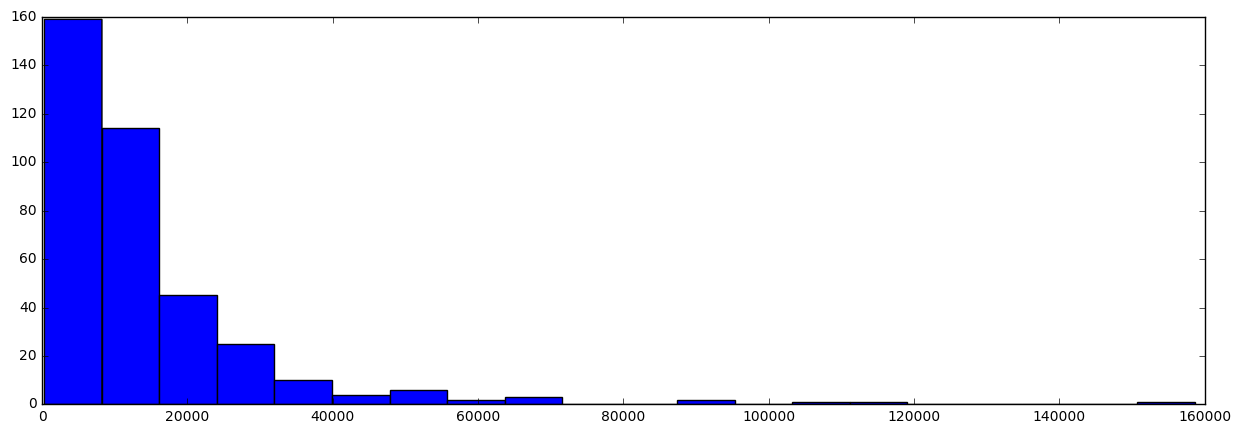

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

avg_ridership_counts = [ridership for ridership, station in traffic_report]
plt.figure(figsize=(15, 5))
hist = plt.hist(avg_ridership_counts, bins=20)

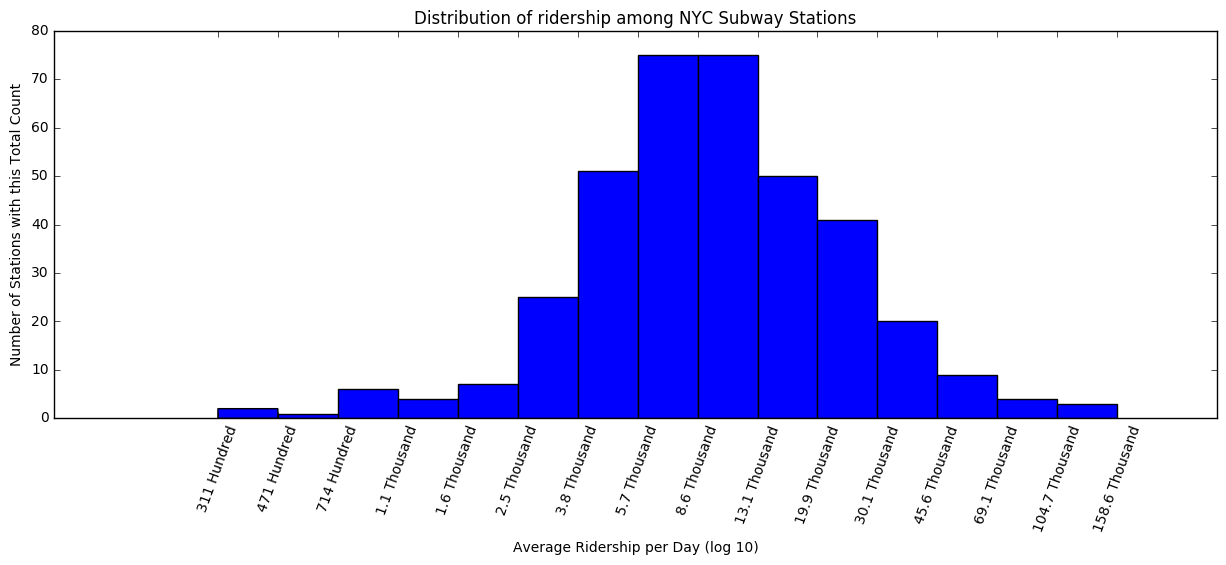

In [21]:
import math

log_counts = []

for count in avg_ridership_counts:
    try:
        log_result = math.log10(count)
    except:
        pass
    
    log_counts.append(log_result)
    
plt.figure(figsize=(15, 5))
n, bins, patches = hist = plt.hist(log_counts, bins=15)

def log_count_to_label(log_count):
    if log_count <= 3:
        return '{0:.0f} Hundred'.format(10 ** (log_count))
    else:
        return '{0:.1f} Thousand'.format(10 ** (log_count-3))

tick_labels = map(log_count_to_label, bins)
ticks = plt.xticks(bins, tick_labels, rotation=70)
plt.xlabel('Average Ridership per Day (log 10)')
plt.ylabel('Number of Stations with this Total Count')
plt.title('Distribution of ridership among NYC Subway Stations')

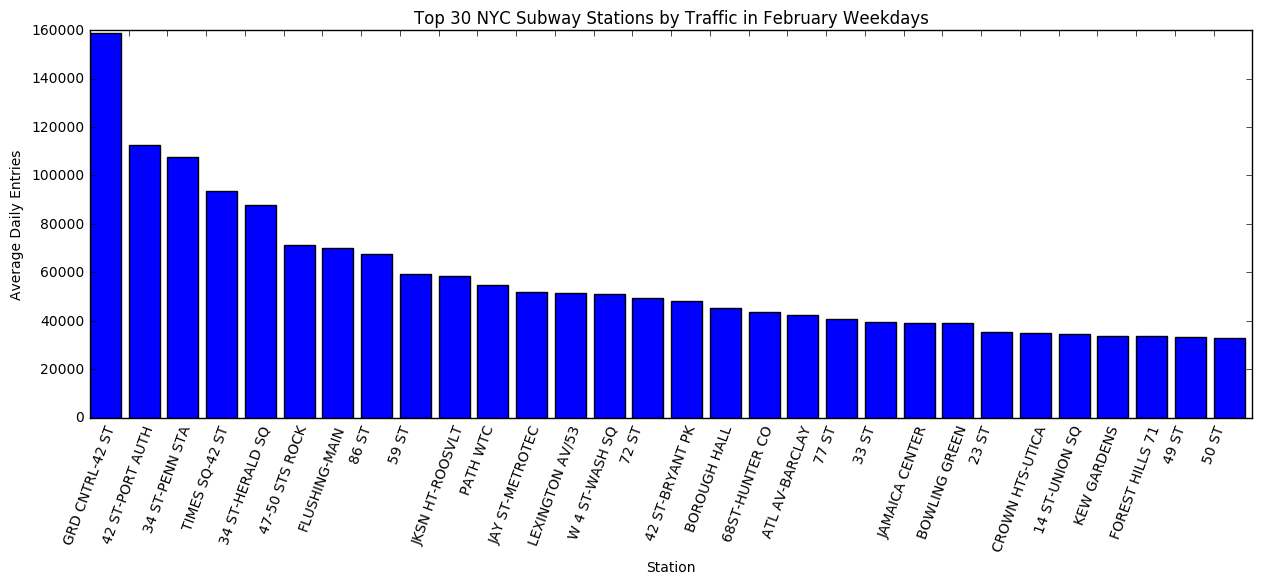

In [28]:
top_stations = traffic_report[:30]
avgs, stations = zip(*top_stations)
indices = range(len(avgs))
plt.figure(figsize=(15,5,))
plt.bar(indices, avgs)
ticks = plt.xticks(indices, stations, rotation = 70)
plt.xlabel('Station')
plt.ylabel('Average Daily Entries')
plt.title('Top 30 NYC Subway Stations by Traffic in February Weekdays')

plt.savefig('figures/mvp.png', bbox_inches='tight')

In [23]:
import pandas as pd

reversed_traffic_report = [reversed(t) for t in traffic_report]
df_to_pickle = pd.DataFrame(reversed_traffic_report, columns=['station', 'avg_daily_traffic_feb'])
df_to_pickle.head()

,station,avg_daily_traffic_feb
0,GRD CNTRL-42 ST,158625
1,42 ST-PORT AUTH,112739
2,34 ST-PENN STA,107514
3,TIMES SQ-42 ST,93595
4,34 ST-HERALD SQ,87825


In [24]:
df_to_pickle.to_pickle('pickle/stations_traffic.p')